# Scikit-learn ML 기본 동작
---
* 1) 데이터 수집 & 준비
* 2) 데이터 전처리
    - 데이터 / 타겟 분리
    - 데이터 표준화 / 정규화
    - 타겟(라벨) 인코딩
* 3) 학습 위한 데이터 준비
    - 데이터셋
        * 학습용 데이터셋 => 학습에 사용
        * 검증용 데이터셋 => 모델 생성 중에 사용
        * 테스트용 데이터셋 => 모델 완성 후 사용
* 4) 학습 모델 생성
    - 학습 방법 선정 및 모델 객체 생성
    - 학습 진행
        * <b>모델 파라미터 최적화</b> => 학습에 의해서 결정되는 파라미터
        * 최적의 모델 파라미터를 찾기 위한 방법 => 최적화(optimizer)
        * ex) 선형회귀에서 W(가중치), b(절편)
    - 모델 평가
        * 성능 개선 => <b>하이퍼파라미터</b>(모델마다 다름) => 모델 튜닝
        * ex) k-NN의 하이퍼파라미터 : k / 학습 횟수, 학습 크기(배치 사이즈), 규제값들
* 5) 모델 테스트
    - 학습에 사용되지 않은 데이터
    - 새로운 데이터로 테스트 진행

In [2]:
# 모듈 로딩 --------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## [1] 데이터 준비

In [4]:
# 시간 : 점수
X=[2, 4, 6, 8, 10, 12]
y=[40, 50, 60, 70, 80, 90]

## [2] 데이터 분포 분석 => EDA => 시각화

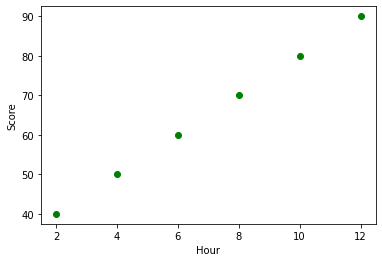

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X, y, color='green')
plt.xlabel('Hour')
plt.ylabel('Score')
plt.show()

- 시간과 점수는 비례 관계
- 선형의 데이터 분포
- 독립변수 => hour
- 종속변수 => score

In [11]:
# 학습에 사용되는 형태로 데이터 변환
import pandas as pd
df=pd.DataFrame({'Hour':X, 'Score':y})
df.shape

(6, 2)

In [12]:
import numpy as np

arrX=np.array(X)
arrY=np.array(y)
print(arrX.shape, arrY.shape)

(6,) (6,)


In [15]:
# 1차원 -> 2차원
arrX=arrX.reshape(-1, 1)
print('arrX.shape :', arrX.shape, 'arrY.shape :', arrY.shape)

arrX.shape : (6, 1) arrY.shape : (6,)


## [3] 학습 방법 선택 및 모델 생성
---
- 시간에 따른 점수 예측
- 데이터 + 라벨 => 지도학습
- 선형 데이터 분포 -> 선형 모델 적용

In [9]:
# 모델 객체 생성
model=LinearRegression()

In [16]:
# 학습 ==> 트레이닝 데이터 사용
# fit() 메서드 => 2차원 형태 데이터가 되어야 함.
model.fit(arrX, arrY)

LinearRegression()

In [19]:
# 모델 파라미터 => w 가중치, b 절편
print('w :', model.coef_,',', 'b :', model.intercept_)

w : [5.] , b : 29.999999999999993


## [4] 모델 평가
---
- 테스트(검증) 데이터로 평가
- score()
    * 분류 : 정답 --- 예측값 => 맞힌 정도
        - <b>정확도(accuracy)</b>
    * 회귀 : 정답 --- 예측값 => 차이 오차(Error)
        - 손실함수(Loss/Cost Function) : MSE, MAE, RMSE 낮을수록 좋음
        - <b>R2 계수 : 0~1 높을수록 좋음</b>
        

In [20]:
# 회귀 => 결정계수 R^2 반환
model.score(arrX, arrY)

1.0

In [23]:
# 오차 확인
from sklearn.metrics import mean_absolute_error, mean_squared_error

preY=model.predict(arrX)
mae=mean_absolute_error(arrX, preY)
mse=mean_squared_error(arrX, preY)

print(mae, mse)

58.0 3550.6666666666665
